In [1]:
import torch
import matplotlib.pyplot as plt
from torchmetrics import JaccardIndex


/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# Load our own modules
import sys

sys.path.append("../src")

from data import *

In [3]:
dataset = ValidationDataset("../Dataset_Student")
labeled = LabeledDataset("../Dataset_Student")
unlabeled = UnlabeledDataset("../Dataset_Student")

In [4]:
model = torch.load("../simvp.pth", map_location=torch.device('cpu'))


In [16]:
# First, get a mask and observe it
model.eval()
model.out_shape = (11,3,160,240)

with torch.no_grad():
    x, label = dataset[0]
    x = x[:11].unsqueeze(0)
    print(x.shape)
    # Transpose, since video resnet expects channels as first dim
    output = model(x).transpose(1,2)
        
print(output.shape)
plt.imshow(output)

torch.Size([1, 11, 3, 160, 240])


RuntimeError: shape '[1, 11, 3, 160, 240]' is invalid for input of size 20697600

[ 0  4 38 44 45]


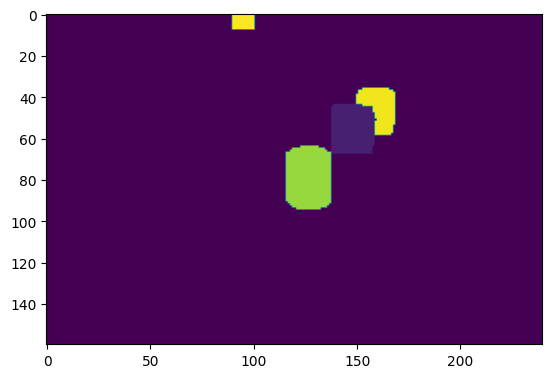

In [6]:

plt.imshow(label[10])
print(np.unique(label[10]))

In [ ]:
model = torch.load("../simvp_mask.pth", map_location=torch.device('cpu'))

In [44]:
import random

model.eval()
with torch.no_grad():
    x, label = dataset[random.randint(0, 1000)]
    x = x[:11].unsqueeze(0)
    # Transpose, since video resnet expects channels as first dim
    output = model(x).transpose(1,2)

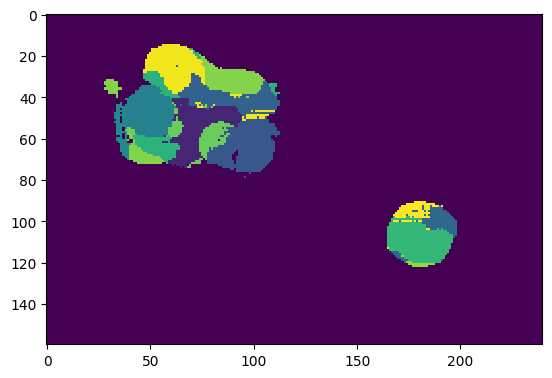

In [45]:
target = torch.tensor(label[11:]).unsqueeze(0)

mask = torch.argmax(output, dim=1).squeeze()
plt.imshow(mask[10], interpolation="none")

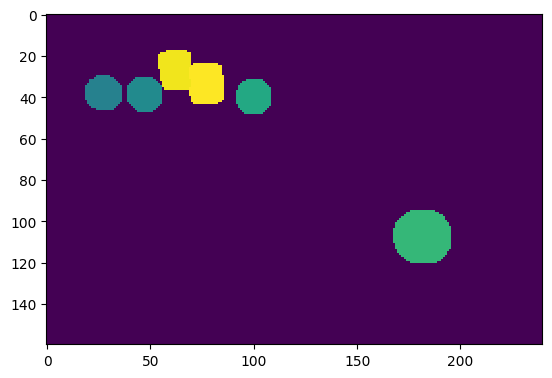

In [46]:
plt.imshow(label[21], interpolation="none")

In [47]:
iou = JaccardIndex(task="multiclass", num_classes=49)
print(iou(output, target))

tensor(0.1130)
